# Chapter 10: Unsupervised Learning
+ Only have features, $X_1, X_2, \ldots, X_p$. No response variable. 
+ Not interested in prediction.
+ Will try and find interesting things in explanatory variables:
    + Find an informative way to visualize data.
    + Discover subgroups among the variables/observations.
+ Principal components analysis: data visualization, data pre-processing.
+ Clustering: discovering unknown subgroups in data. 

## Challenge of Unsupervised Learning
+ Not always an exact goal.
+ Part of an EDA.
+ The results is hard to assess. No way to check the results.

### Applications
1. A cancer researcher might assay gene expression levels in 100 patients with breast cancer. He or she might then look for subgroups among the breast cancer samples, or among the genes, in order to obtain a better understanding of the disease.

2. An online shopping site might try to identify groups of shoppers with similar browsing and purchase histories, as well as items that are of particular interest to the shoppers within each group. Then an individual shopper can be preferentially shown the items in which he or she is particularly likely to be interested, based on the purchase histories of similar shoppers.

3. A search engine might choose what search results to display to a particular individual based on the click histories of other individuals with similar search patterns.

## Principal Components Analysis
+ Previously we discussed principal component regression where the original features were mapped to a smaller feature space that are then used as inputs into linear regression.
+ The principal component directions are presented as directions in feature space along which the original data are highly variable.
+ In PCA, these components is used in understanding the data.
+ PCA can be used to visualize high dimensional data in 2 or 3 dimensions. 

## What are Principal Components
+ PCA finds a low-dimensional representation of a data set that contains as much as possible of the variation.
+ PCA seeks a small number of dimensions that are as interesting as possible. The concept of interesting is measured by the amount that the observations vary along each dimension.
+ Each of the dimensions found by PCA is a linear combination of the p features.
+ The first principal component is a weighted linear combination of all the original features 
$$Z_1 = \phi_{11}X_1 + \phi_{21}X_2 + \ldots + \phi_{p1}X_p$$
where the sum of the squared weights equals 1. These weights are the **loading factors**. 
+ The loading factors of the first principal component maximize the weighted sum of the features for each observation.
+ $\phi_1 = (\phi_{11} \; \phi_{21} \; \cdots \; \phi_{p1} )^T$ is the loading vector which defines a direction in feature space along which the data vary the most.
+ If we project the n data points onto this direction, the projected values are the principal component scores $z_{11}, \ldots, z_{n1}$ themselves.
+ The first PC can also be interpreted as the line closest to the data.
+ The second principal component is uncorrelated with the first which makes it orthogonal to it.
+ Very important to scale the data first - 0 mean, 1 std. The variances won't make sense otherwise.
+ The principal components can be plot against each other in order to produce low-dimensional views of the data.





### Lab: USArrests data set
+ 50 states in the United States
+ The number of arrests per 100, 000 residents for each of three crimes: **Assault**, **Murder**, and **Rape**. Also **UrbanPop** (the percent of the population in each state living in urban areas).
+ PC score vectors length, $n=50$.
+ PC loading vectors length, $p=4$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data/USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [5]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

+ Not surprisingly, the variables also have vastly different variances: the${\tt UrbanPop}$ variable measures the percentage of the population in each state living in an urban area, which is not a comparable number to the number of crimes committeed in each state per 100,000 individuals. 
+ If we failed to scale the variables before performing PCA, then most of the principal components that we observed would be driven by the ${\tt Assault}$ variable, since it has by far the largest mean and variance. 
+ Thus, it is important to standardize the variables to have mean zero and standard deviation 1 before performing PCA. 
+ We can do this using the ${\tt scale()}$ function from ${\tt sklearn}$:

In [6]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

Now we'll use the ${\tt PCA()}$ function from ${\tt sklearn}$ to compute the loading vectors:

In [7]:
print(X.mean())
print(X.var())

Murder     -7.105427e-17
Assault     1.387779e-16
UrbanPop   -4.396483e-16
Rape        8.593126e-16
dtype: float64
Murder      1.020408
Assault     1.020408
UrbanPop    1.020408
Rape        1.020408
dtype: float64


In [8]:
from sklearn.decomposition import PCA

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


+ We see that there are four distinct principal components. 
+ This is to be expected because there are in general ${\tt min(n − 1, p)}$ informative principal components in a data set with $n$ observations and $p$ variables.
+ Using the fit_transform() function, we can get the principal component scores of the original data. 


In [9]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


We can construct a **biplot** of the first two principal components using our loading vectors:

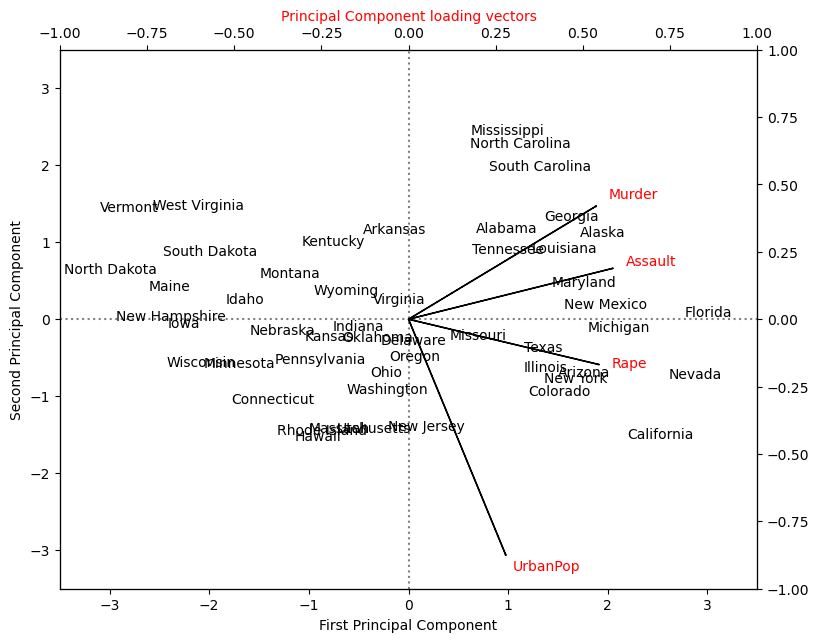

In [10]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, pca_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], pca_loadings.V2[3])

## Focus on the bottom and left axis

+ The state names represent the scores for the first two principal components.
+ The line indicate the first two principal component loading vectors. i.e. the loading for **Rape** on the 1st component is 0.54, and 2nd component -0.17.
+ First loading vector places approximately equal weight on **Assault**, **Murder**, and **Rape**, with much less weight on **UrbanPop**. Hence this component roughly corresponds to a measure of overall rates of serious crimes.
+ The second loading vector places most of its weight on **UrbanPop**. Hence, this component roughly corresponds to the level of urbanization of the state.
+ This indicates that the crime-related variables are correlated with each other. States with high murder rates tend to have high assault and rape rates. And that the **UrbanPop** variable is less correlated with the other three.
+ The loading vectors suggests that states with large positive scores on the first component, such as California, Nevada and Florida, have high crime rates. While states like North Dakota, with negative scores on the first component, have low crime rates.
+ California also has a high score on the second component, indicating a high level of urbanization, while the opposite is true for states like Mississippi. 
+ States close to zero on both components, such as Indiana, have approximately average levels of both crime and urbanization.

### Uniqueness of the Principal Components
+ Each principal component loading vector is unique, up to a sign flip. 
+ This means that two different software packages will yield the same principal component loading vectors, although the signs of those loading vectors may differ (Refer to the example in the book)
+ The signs may differ because each principal component loading vector specifies a direction in p-dimensional space: flipping the sign has no effect as the direction does not change.
+ Similarly, the score vectors are unique up to a sign flip, since the variance of $Z$ is the same as the variance of $−Z$.

### Proportion of variance explained
+ Each principal component explains some of the variance of the original data. 
+ We can find the proportion that each principal component explains by dividing each components variance by the total raw variance. 
+ Summing all the variances for each component equals 1.
+ Examine a **scree plot** (for an elbow) to choose the number of principal components to use. Or can use cross validation to choose.
+ The ${\tt PCA()}$ function outputs the variance explained by of each principal component. 

In [11]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [12]:
## the proportion of variance explained (PVE)
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

+ We see that the first principal component explains 62.0% of the variance in the data 
+ the next principal component explains 24.7% of the variance, and so forth. 
+ We can plot the PVE explained by each component as follows:

([<matplotlib.axis.XTick at 0x194d60db390>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

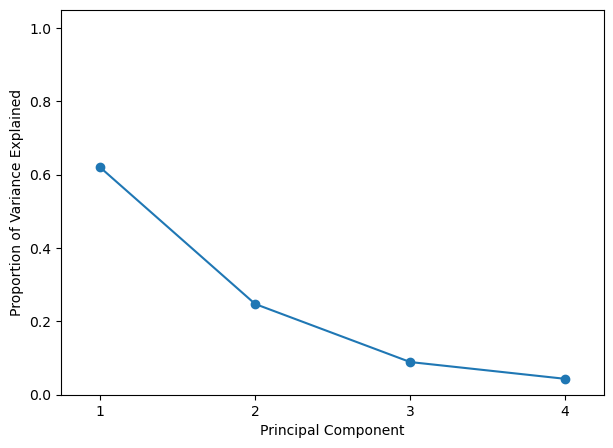

In [13]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

We can also use the function ${\tt cumsum()}$, which computes the cumulative sum of the elements of a numeric vector, to plot the cumulative PVE:

([<matplotlib.axis.XTick at 0x194d85dd510>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

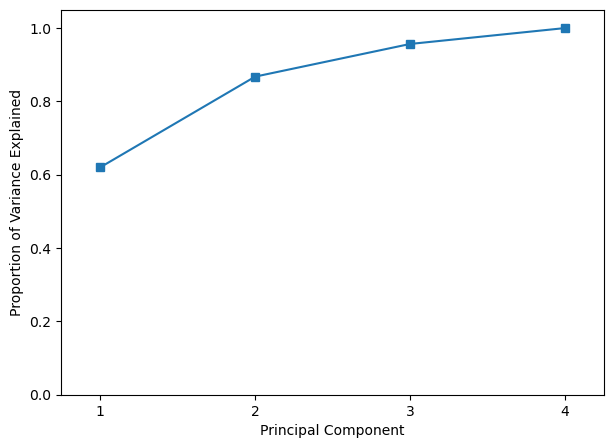

In [14]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])


### Lab: NCI60 Data Example
+ 𝙽𝙲𝙸𝟼𝟶NCI60  cancer cell line microarray data, which consists of 6,830 gene expression measurements on 64 cancer cell lines:

In [15]:
df2 = pd.read_csv('data/nci60_data.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [16]:
# Read in the labels to check our work later
y = pd.read_csv('data/nci60_labs.csv', usecols=[1], skiprows=1, names=['type'])

We first perform PCA on the data after scaling the variables (genes) to
have standard deviation one, although one could reasonably argue that it
is better not to scale the genes:

In [17]:
# Scale the data
X = pd.DataFrame(scale(df2))
X.shape

# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

We now plot the first few principal component score vectors, in order to
visualize the data. The observations (cell lines) corresponding to a given
cancer type will be plotted in the same color, so that we can see to what
extent the observations within a cancer type are similar to each other:

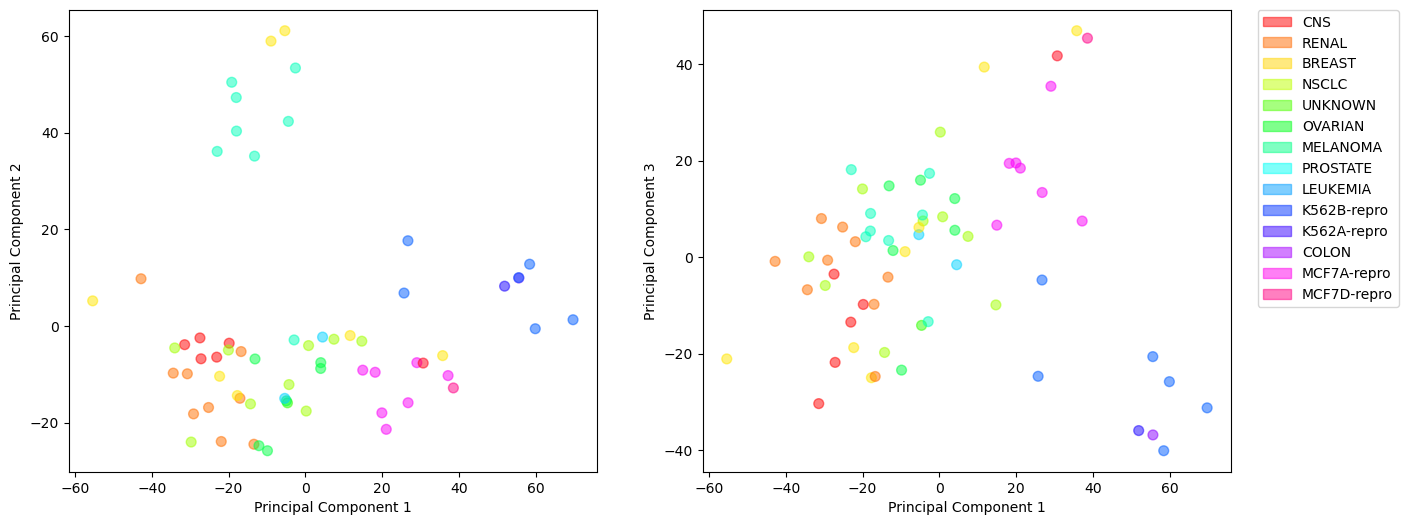

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv

# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# Custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1') 

+ On the whole, cell lines corresponding to a single cancer type do tend to have similar values on the first few principal component score vectors. 
+ This indicates that cell lines from the same cancer type tend to have pretty similar gene expression levels.

+ We can generate a summary of the proportion of variance explained (PVE) of the first few principal components:

In [19]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(),
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
             index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Using the ${\tt plot()}$ function, we can also plot the variance explained by the
first few principal components:

Text(0, 0.5, 'Variances')

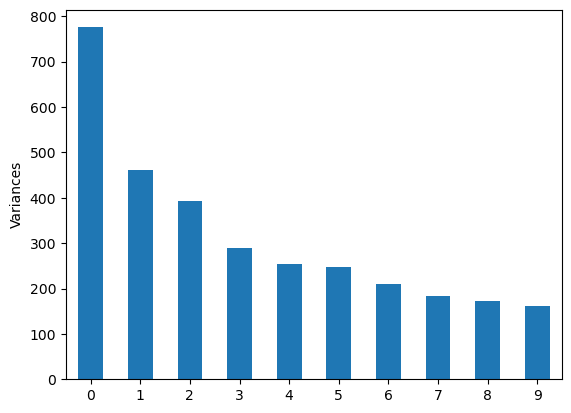

In [20]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

However, it is generally more informative to
plot the PVE of each principal component (i.e. a **scree plot**) and the cumulative
PVE of each principal component. This can be done with just a
little tweaking:

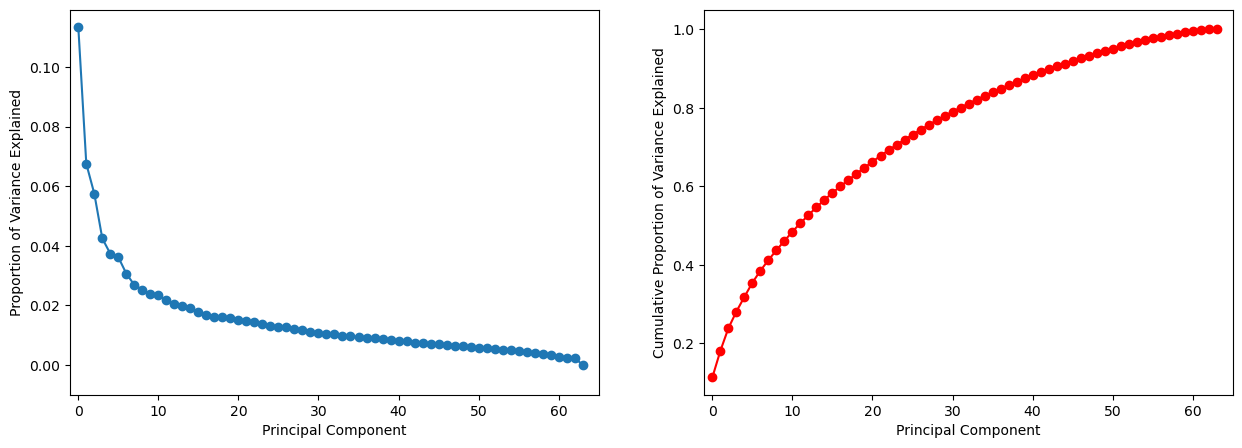

In [21]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)    

+ We see that together, the first seven principal components explain around 40% of the variance in the data. 
+ This is not a huge amount of the variance. 
+ However, looking at the scree plot, we see that while each of the first seven principal components explain a substantial amount of variance, there is a marked decrease in the variance explained by further principal components. 
+ That is, there is an **elbow** in the plot after approximately the seventh principal component. 
+ This suggests that there may be little benefit to examining more than seven or so principal components.
